In [ ]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns




Data Preprocessing

In [ ]:
uber_data=pd.read_csv('/content/Uber-Jan-Feb-FOIL.csv')
uber_data.head(20)


,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
5,B02598,1/1/2015,870,6903
6,B02598,1/2/2015,785,4768
7,B02617,1/2/2015,1137,7065
8,B02512,1/2/2015,175,875
9,B02682,1/2/2015,890,5506


In [ ]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [ ]:
uber_data.describe()

,active_vehicles,trips
count,354.000000,354.000000
mean,1307.435028,11667.316384
std,1162.510626,10648.284865
min,112.000000,629.000000
25%,296.750000,2408.500000
50%,1077.000000,9601.000000
75%,1417.000000,13711.250000
max,4395.000000,45858.000000


In [ ]:
uber_data.isnull().sum()


,0
dispatching_base_number,0
date,0
active_vehicles,0
trips,0


In [ ]:
df=uber_data

In [ ]:
df['date']=pd.to_datetime(df['date'])

#checking missing value
print(df.isnull().sum())

dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64


In [ ]:
#drop any duplicates
df=df.drop_duplicates()

#Sort by Date
df=df.sort_values(by='date')

In [ ]:
#creating new features for analysis
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.day_name()
df['trips_per_vehicle'] = df['trips'] / df['active_vehicles']

In [ ]:
#printing dataset after preprocessing
df.head(20)

,dispatching_base_number,date,active_vehicles,trips,day,month,weekday,trips_per_vehicle
0,B02512,2015-01-01,190,1132,1,1,Thursday,5.957895
1,B02765,2015-01-01,225,1765,1,1,Thursday,7.844444
2,B02764,2015-01-01,3427,29421,1,1,Thursday,8.585060
3,B02682,2015-01-01,945,7679,1,1,Thursday,8.125926
4,B02617,2015-01-01,1228,9537,1,1,Thursday,7.766287
5,B02598,2015-01-01,870,6903,1,1,Thursday,7.934483
11,B02764,2015-01-02,3147,19974,2,1,Friday,6.346997
10,B02765,2015-01-02,196,1001,2,1,Friday,5.107143
9,B02682,2015-01-02,890,5506,2,1,Friday,6.186517
7,B02617,2015-01-02,1137,7065,2,1,Friday,6.213720


Exploratory Data Analysis (EDA)

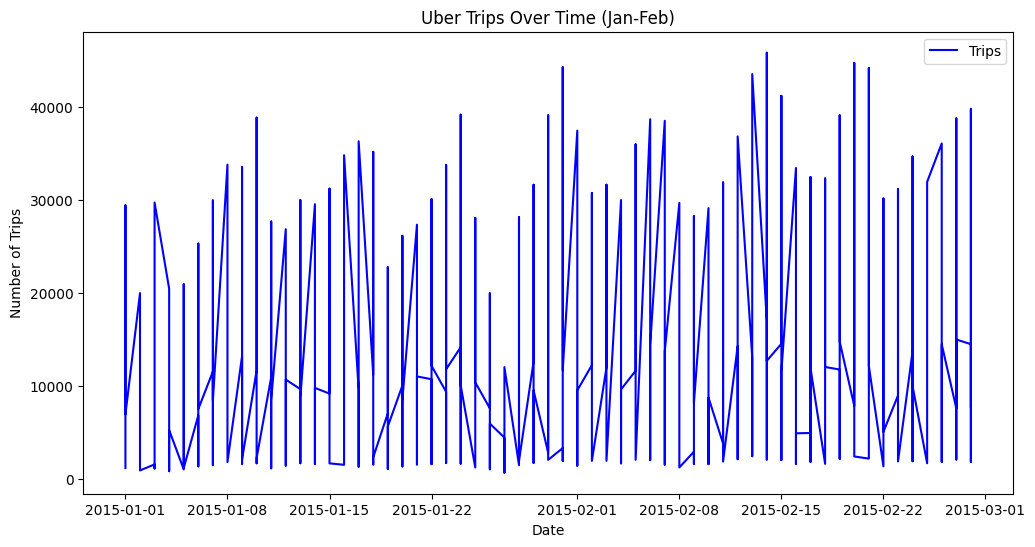

In [ ]:
# 1. Trips over time
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['trips'], label="Trips", color="blue")
plt.title("Uber Trips Over Time (Jan-Feb)")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.legend()
plt.show()

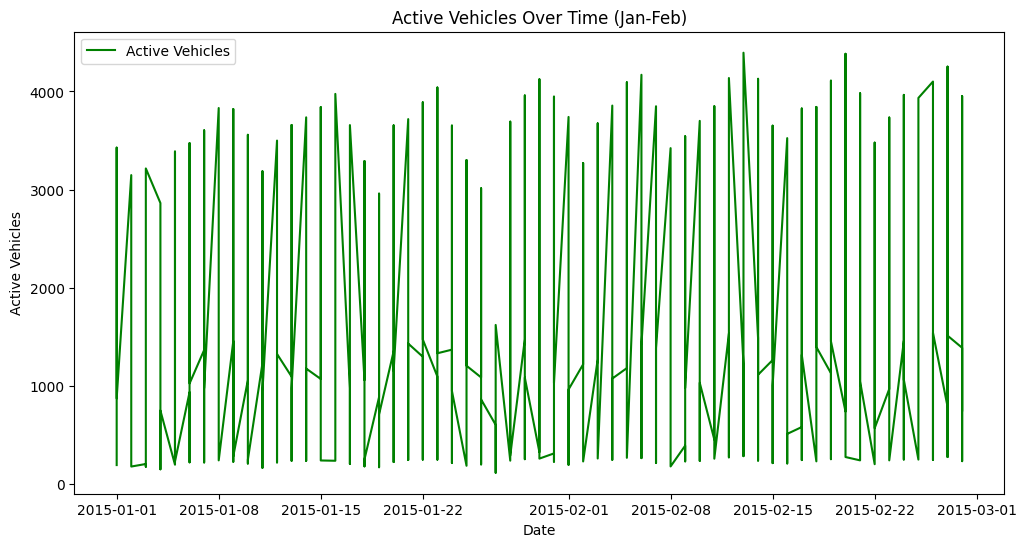

In [ ]:
# 2. Active vehicles over time
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['active_vehicles'], label="Active Vehicles", color="green")
plt.title("Active Vehicles Over Time (Jan-Feb)")
plt.xlabel("Date")
plt.ylabel("Active Vehicles")
plt.legend()
plt.show()

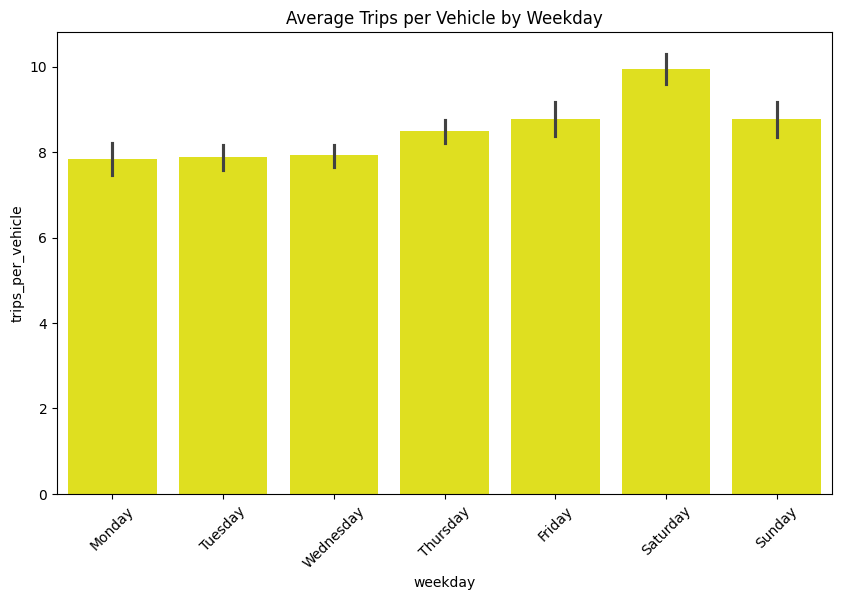

In [ ]:
# 3. Average trips per vehicle by weekday
plt.figure(figsize=(10,6))
sns.barplot(x="weekday", y="trips_per_vehicle", data=df, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],color="yellow")
plt.title("Average Trips per Vehicle by Weekday")
plt.xticks(rotation=45)
plt.show()

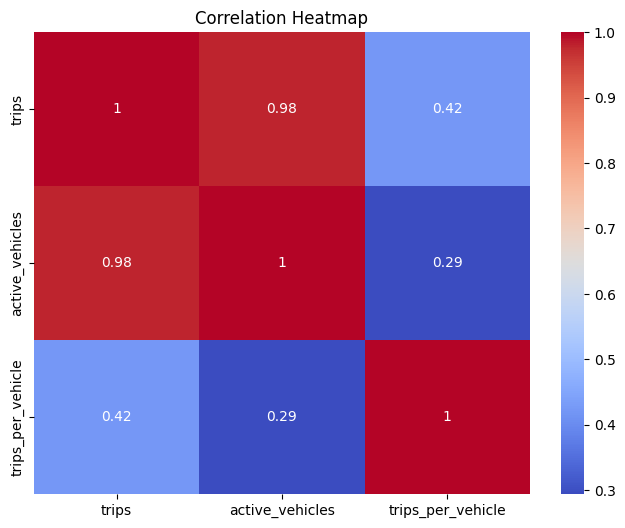

In [ ]:
# 4. Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['trips','active_vehicles','trips_per_vehicle']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

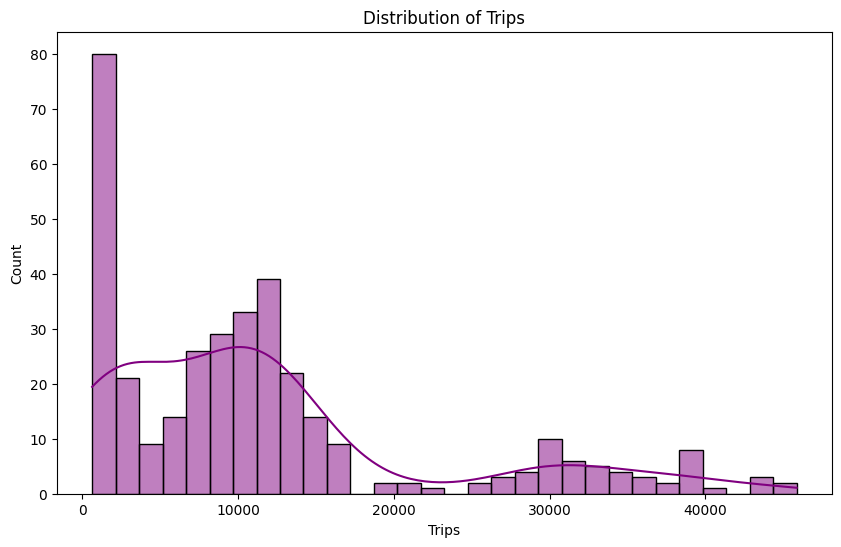

In [ ]:
# 5. Trips distribution
plt.figure(figsize=(10,6))
sns.histplot(df['trips'], bins=30, kde=True, color="purple")
plt.title("Distribution of Trips")
plt.xlabel("Trips")
plt.show()

Feature Engineering


In [ ]:
# Lag features (yesterday’s trips & vehicles)
df['trips_lag1'] = df['trips'].shift(1)
df['vehicles_lag1'] = df['active_vehicles'].shift(1)

# Rolling averages (last 7 days trend)
df['trips_rolling7'] = df['trips'].rolling(window=7).mean()
df['vehicles_rolling7'] = df['active_vehicles'].rolling(window=7).mean()

# Weekend feature
df['is_weekend'] = df['weekday'].isin(['Saturday','Sunday']).astype(int)

# Month name
df['month_name'] = df['date'].dt.month_name()

# Drop missing values from rolling/lag
df = df.dropna()

print("Engineered Features:")
df.head(20)


Engineered Features:


,dispatching_base_number,date,active_vehicles,trips,day,month,weekday,trips_per_vehicle,trips_lag1,vehicles_lag1,trips_rolling7,vehicles_rolling7,is_weekend,month_name
35,B02598,2015-01-06,933,6816,6,1,Tuesday,7.305466,1133.0,227.0,7081.142857,1116.714286,0,January
34,B02512,2015-01-06,218,1314,6,1,Tuesday,6.027523,6816.0,933.0,7128.285714,1120.142857,0,January
33,B02765,2015-01-06,234,1376,6,1,Tuesday,5.880342,1314.0,218.0,6466.000000,1017.714286,0,January
32,B02617,2015-01-06,1336,10128,6,1,Tuesday,7.580838,1376.0,234.0,6784.428571,1034.571429,0,January
30,B02764,2015-01-06,3473,25301,6,1,Tuesday,7.285056,10128.0,1336.0,7409.428571,1046.857143,0,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,B02617,2015-02-28,1372,14022,28,2,Saturday,10.220117,14472.0,1386.0,15676.714286,1636.857143,1,February
352,B02512,2015-02-28,230,1803,28,2,Saturday,7.839130,14022.0,1372.0,13837.571429,1448.142857,1,February
348,B02598,2015-02-28,994,10319,28,2,Saturday,10.381288,1803.0,230.0,13775.285714,1431.000000,1,February
349,B02764,2015-02-28,3952,39812,28,2,Saturday,10.073887,10319.0,994.0,19169.000000,1956.714286,1,February


Model Building


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features & target
features = ['active_vehicles', 'trips_lag1', 'vehicles_lag1',
            'trips_rolling7', 'vehicles_rolling7', 'is_weekend']
target = 'trips'

X = df[features]
y = df[target]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

Model Performance:
MAE: 985.6426360230486
RMSE: 1431.8632675123572
R2 Score: 0.9837683234544349


Model Evaluation (visualization)

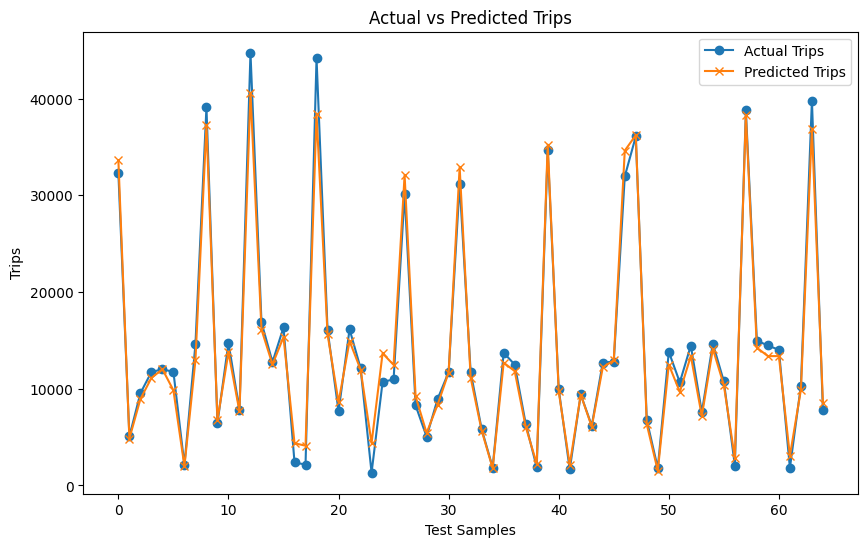

In [ ]:
# 1. Actual vs Predicted Plot
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual Trips", marker='o')
plt.plot(y_pred, label="Predicted Trips", marker='x')
plt.title("Actual vs Predicted Trips")
plt.xlabel("Test Samples")
plt.ylabel("Trips")
plt.legend()
plt.show()




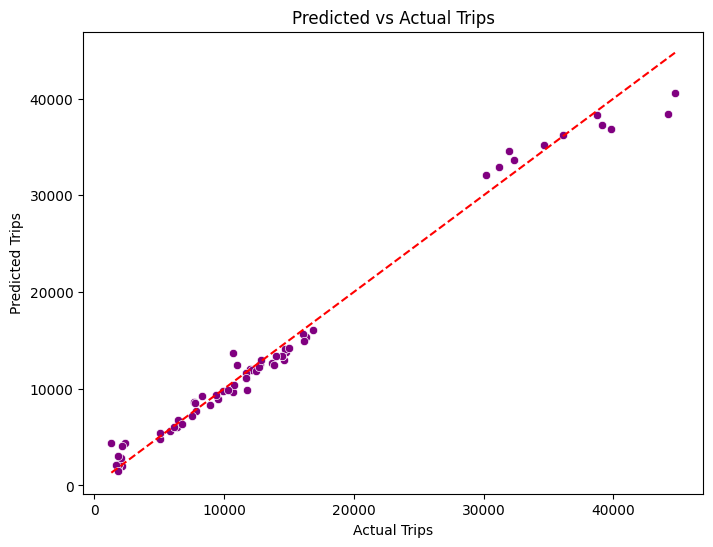

In [ ]:
# 2. Scatter Plot (Predicted vs Actual)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.title("Predicted vs Actual Trips")
plt.xlabel("Actual Trips")
plt.ylabel("Predicted Trips")
plt.show()



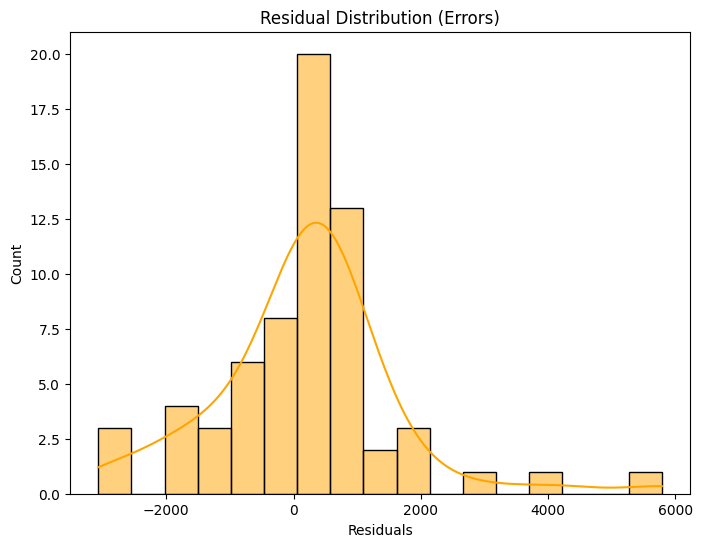

In [ ]:
# 3. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color="orange")
plt.title("Residual Distribution (Errors)")
plt.xlabel("Residuals")
plt.show()



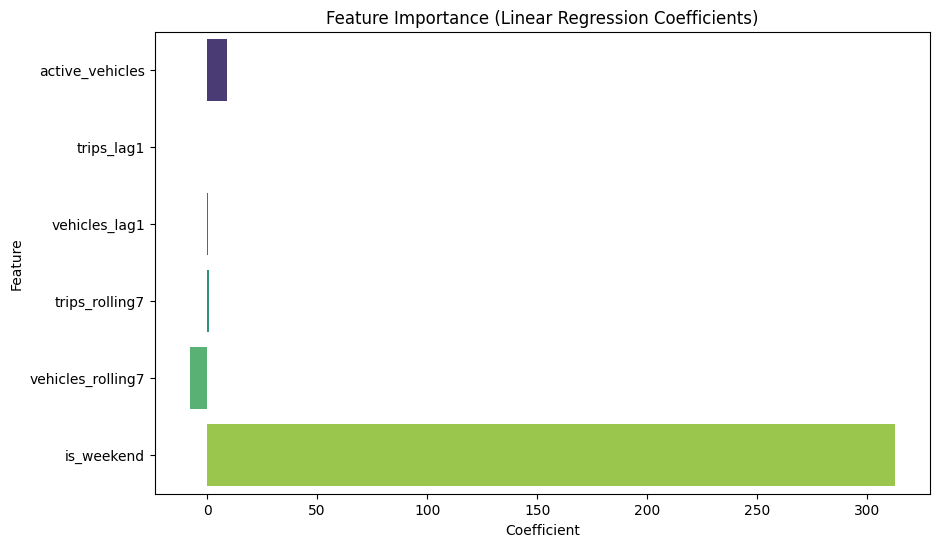

In [ ]:
# 4. Feature Importance (Coefficients)
coef_df = pd.DataFrame({"Feature": features, "Coefficient": model.coef_})
plt.figure(figsize=(10,6))
sns.barplot(x="Coefficient", y="Feature", data=coef_df, hue="Feature", palette="viridis", legend=False)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()